<a href="https://colab.research.google.com/github/HeerKukreja/Flood-Prediction-using-AI/blob/add_python/Python/FloodPredictionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/My Drive/data/WeatherData.csv"
dataset = pd.read_csv(path)

In [ ]:
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.utils import resample

In [ ]:
import numpy as np
X = np.concatenate((X_train, y_train[:,None]), axis=1)

In [ ]:
no_floods = X[X[:,4]==0]
floods = X[X[:,4]==1]

In [ ]:
no_floods_downsampled = resample(no_floods,
                                replace = False, # sample without replacement
                                n_samples = len(floods), # match minority n
                                random_state = 27) # reproducible results

In [ ]:
downsampled = np.concatenate([no_floods_downsampled, floods])

In [ ]:
np.random.shuffle(downsampled)

In [ ]:
X = downsampled[:,0:4]
y = downsampled[:, 4]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
accuracy_score(y_test, rfc_pred)

0.9904240766073872

In [ ]:
recall_score(y_test, rfc_pred)

0.0

In [ ]:
f1_score(y_test, rfc_pred)

0.0

In [ ]:
rf_probs = rfc.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, rf_probs)

In [ ]:
roc_value

1.0

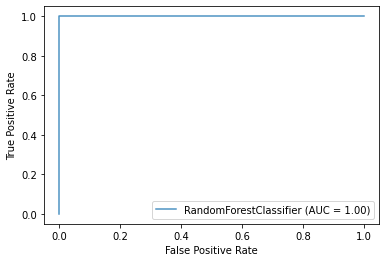

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [ ]:
estimator = rfc.estimators_[5]

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = dataset.columns[:4],
                class_names = ["No Flood","Flood"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


0

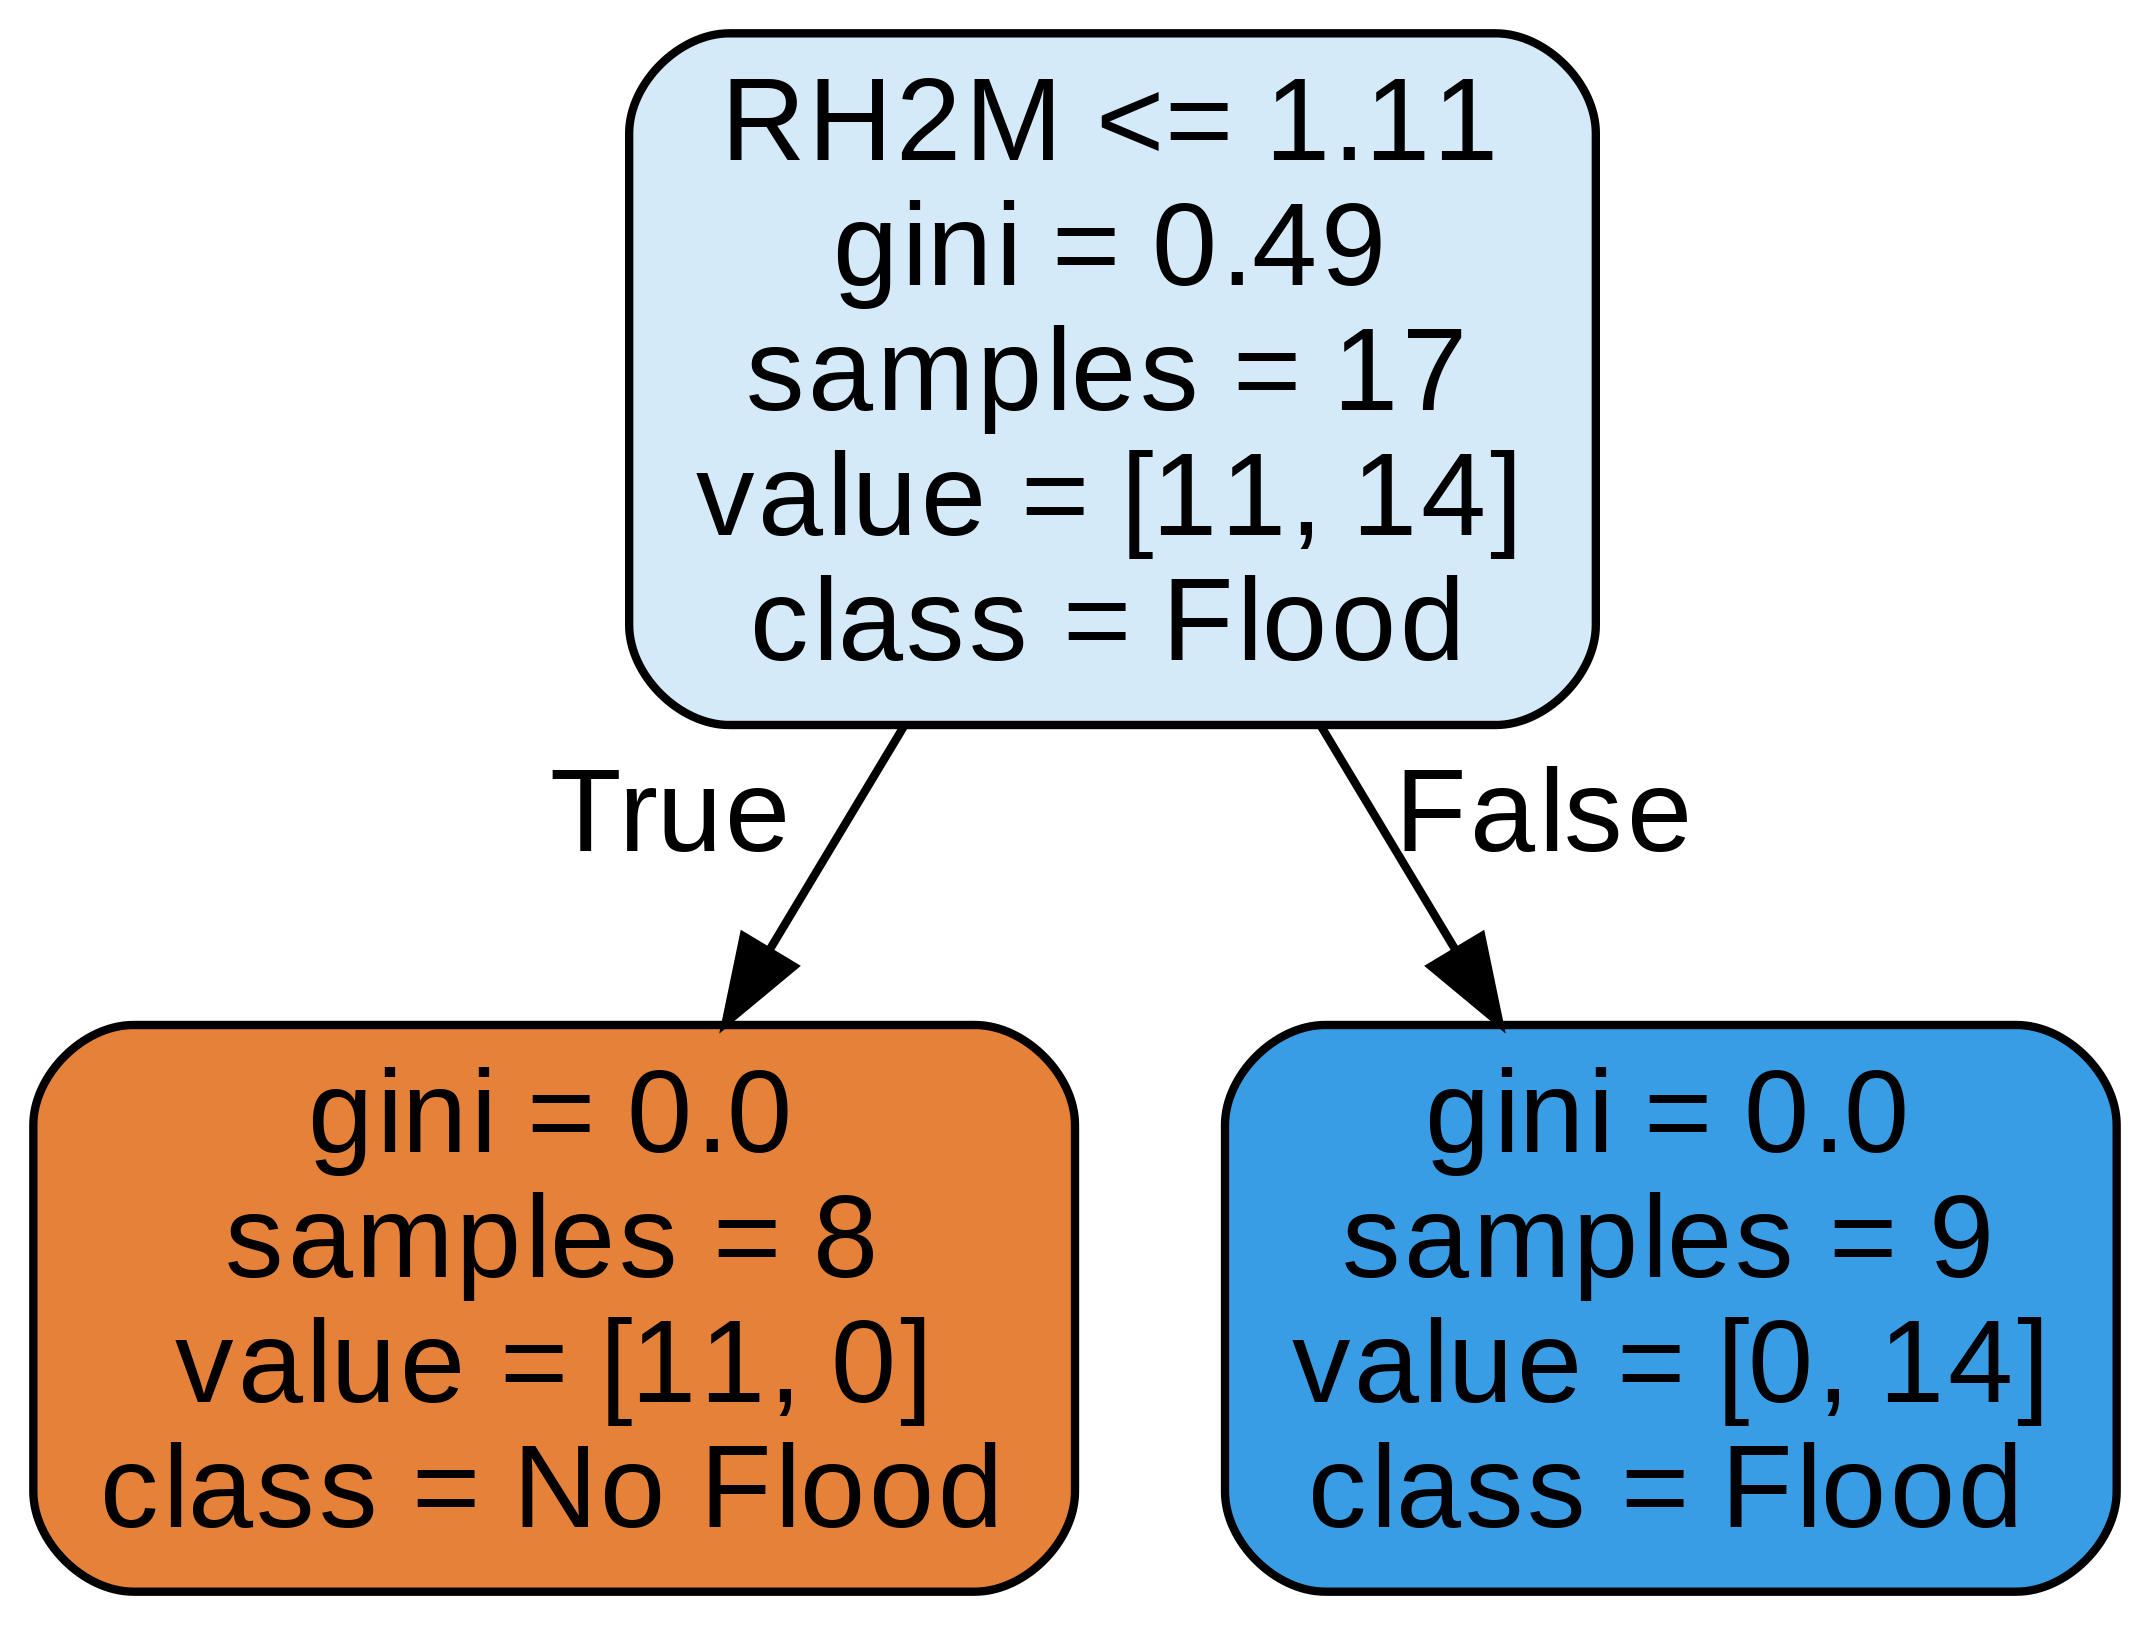

In [ ]:
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

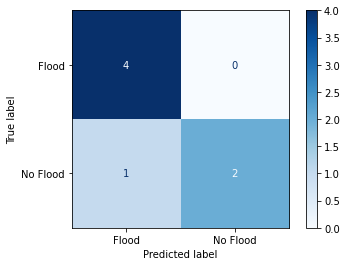

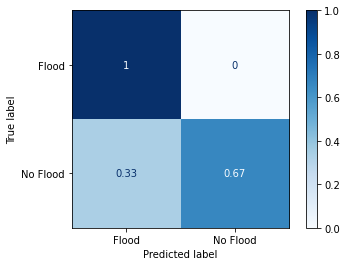

In [ ]:
from sklearn.metrics import plot_confusion_matrix
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=["Flood","No Flood"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)